In [1]:
import gym 
from inventory_env import Inventory 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# random  policy, unknown value

T = 100000 # episode length
env = Inventory(length=T) # create  the  inventory  network  environment  with default parameters and specified episode length
n_episodes = 100 # number  of  episodes  to  run
avg_reward = np.zeros((n_episodes, T))
for i in range(n_episodes):
    
    done = False
    env.reset()
    reward_sum = 0
    t = 0
    
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        reward_sum = reward_sum + reward
        avg_reward[i,t] = (reward_sum)*T/(t+1)
        t = t + 1

241.66985922949019 +/- 26.996155220498036


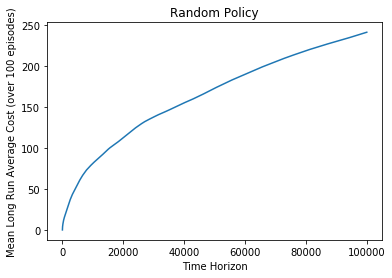

In [3]:
print(-np.mean(avg_reward[:,-1]), '+/-', 1.96*np.std(avg_reward[:,-1])/np.sqrt(n_episodes))
plt.xlabel("Time Horizon")
plt.ylabel("Mean Long Run Average Cost (over 100 episodes)")
plt.title("Random Policy")
plt.plot(-np.mean(avg_reward, axis=0))

In [4]:
# optimal constant order policy, we know from theory should have value of about .732

# let lambda = p = h = L = 1
# then the optimal constant order policy has r_inf = 1 - srt(1/3) (approx .423)
# and the optimal constant order policy has a long run average cost of
#   C(pi_{r_inf}) = sqrt(3) - 1 (approx .732)

T = 100000 # episode length
r = 1-(1/3)**(1/2) #value for constant order policy
env = Inventory(length=T) # create  the  inventory  network  environment  with default parameters and specified episode length
n_episodes = 100 # number  of  episodes  to  run
avg_reward = np.zeros((n_episodes, T))
for i in range(n_episodes):
    
    done = False
    env.reset()
    reward_sum = 0
    t = 0
    
    while not done:
        action = np.array([r])
        obs, reward, done, info = env.step(action)
        reward_sum = reward_sum + reward
        avg_reward[i,t] = (reward_sum)*T/(t+1)
        t = t + 1

0.731550968621256 +/- 0.0005072512186637032


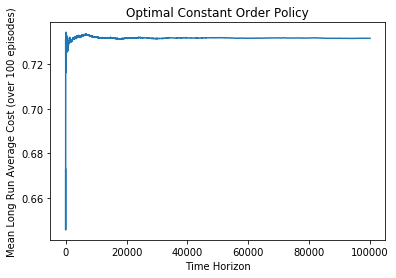

In [5]:
print(-np.mean(avg_reward[:,-1]), '+/-', 1.96*np.std(avg_reward[:,-1])/np.sqrt(n_episodes))
plt.xlabel("Time Horizon")
plt.ylabel("Mean Long Run Average Cost (over 100 episodes)")
plt.title("Optimal Constant Order Policy")
plt.plot(-np.mean(avg_reward, axis=0))